# Animation with Matplotlib
**SSIE 500 - Intro to Computational Tools, Fall 2020**

**Professor Hiroki Sayama**

For systems scientists who want to visualize changing variables over time, animated visualizations provide the powerful ability to see the underlying dynamics of a process. However, most plotting solutions only offer a static image - the final result. This doesn't allow the scientist to observe how a process unfolded and changed over time. Luckily the `matplotlib.animate` package provides the ability to create animations with a few simple parameters, making it easier to gain insight into a changing system.

## Clone, fork, or copy our code from Github

### **Visit**: [https://github.com/ssie-projects/ssie-500-matplotlib-animation](https://github.com/ssie-projects/ssie-500-matplotlib-animation)

## Project Team
* Roman Kostner
* Duxiao Hao
* Christian Lemp

## References

* [Animations with Matplotlib - Parul Pandey](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
* https://mathworld.wolfram.com/ParametricEquations.html
* https://stackoverflow.com/a/51528612
* https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib-animation-funcanimation
* https://alexgude.com/blog/matplotlib-blitting-supernova/


# Step 1: Environment and Notebook

## Import Python packages

`animation` is a function within matplotlib...

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# to display static plots in the notebook
%matplotlib inline

plt.style.use('seaborn-pastel')

# Step 2: Setting up

## Configure analysis

In [2]:
# Height and width of canvas
maze_height = 50
maze_width = 50
# Density of the maze
pct_maze_fill = 0.03

print("Num. of squares in canvas:", maze_height * maze_width)
print("Num. of wall squares:", int(pct_maze_fill * maze_height * maze_width))

Num. of squares in canvas: 2500
Num. of wall squares: 75


## Generate maze data

In this step we will generate the data used to create "walls" of the maze. Unlike our example in class that relied on `matplotlib.plt.imgshow` function to display the canvas, we will instead use this data to draw create a static plot on our animated maze in a later step.


Need to create an empty working canvas, and the `line,` variable - a special `matplotlib` object that we will fill with data for the animation.

Preview of random maze


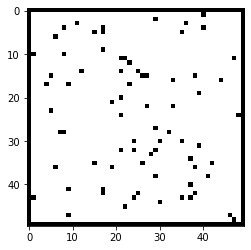

In [3]:
# Initialize maze
maze = np.zeros([maze_height, maze_width])

# Fill in maze outer walls
for i in range(50):
    maze[i, 0] = 1
    maze[i, 49] = 1
    maze[0, i] = 1
    maze[49, i] = 1

# Fill in maze inner walls
for i in range(int(pct_maze_fill * maze_height * maze_width)):
    # assign x, y randomly over each iteration
    x = np.random.randint(1, 49)
    y = np.random.randint(1, 49)
    
    # if 1 or fewer NSEW blocks around x,y are filled in, fill x,y
    if maze[x-1,y] + maze[x+1,y] + maze[x,y+1] + maze[x,y-1] <= 1:     
        maze[x,y] = 1
        
# Plot the maze
print("Preview of random maze")
plt.imshow(maze, cmap="binary")

In [ ]:
# Need to convert `maze` binary matrix into True/False
# and list coordinates to fill in.
# np.argwhere(maze.astype(bool)).tolist()
# maze.astype(bool)

# Step 3: Setting up the static canvas

### Draw the static background
Need to create an empty working canvas, and the `line,` variable - a special `matplotlib` object that we will fill with data for the animation.

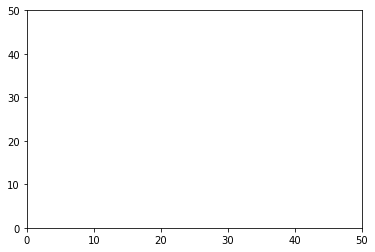

In [4]:
# # Create an empty canvas,then set its dimensions
fig = plt.figure()
ax = plt.axes(xlim=(0,maze_width), ylim=(0,maze_height))
# # Then create an empty line object
line, = ax.plot([], [], lw=3)
# # The line object will be populated with data later.

## Create the `init` function
Draw the background of the animation. The `init()` function returns an iterable of `artists` to be updated upon each iteration.

This example builds upon [link](https://alexgude.com/blog/matplotlib-blitting-supernova/).

In [5]:
def init():
    """
    Initialize matplotlib figure. Used to draw first 
    frame of your animation.
    """
    # The line object will be populated with data later.
    # Set the axis and plot titles
    ax.set_title("SSIE500 - Matplotlib Animation")
    
    # Fill in the maze.
    maze_coords = np.argwhere(maze.astype(bool)).tolist()
    ax.scatter(*zip(*maze_coords), cmap="binary", marker="s", c="black")
    
    # Initialize an empty `path`
    line.set_data([],[])
    return line,

In [ ]:
# np.argwhere(maze.astype(bool)).tolist()

In [ ]:
# np.argwhere(maze.astype(bool)).tolist()

# Step 4: Generating data and setting up animation

## Run maze algorithm and fill `path` list

In [6]:
x, y = 1, 1
target = (40, 40)
path = [(x, y)]
print("path start:", path)
while (x, y) != target:
    next_locations = [(x+dx, y+dy) for dx, dy
                    in [(-1,0),(1,0),(0,-1),(0,1)]
                    if maze[x+dx, y+dy]==0]
    j = np.random.randint(len(next_locations))
    x, y = next_locations[j]
    
    # reduce redundancy by only including new locations not 
    # already in the path
    if (x, y) not in path:
        path.append((x, y))
    else:
#         # if the path was visited, trim all locations since it was visited the first time
        k = path.index((x, y)) # find which step this location was visited
        path = path[:k+1]
print("---")
print("finished. (x,y) =",(x, y))
print("number of steps:", len(path))

path start: [(1, 1)]
---
finished. (x,y) = (40, 40)
number of steps: 125


## Create the `animate` function

This is a function that will iterate when called in the next step from `matplotlib.animation.FuncAnimation`. It takes an iterator variable as an argument, which will start at `0` and increment by `1` each step until the number of frames is reached (also set in the `FuncAnimation` step).

In [7]:
# Design visualization
def animate(i):
    # Add data to the line
    # About the data structure:
    # ax.plot() is stored in a variable named line above.
    # Initialized as ax.plot([], [], lw=3)
    # Each "i" update in the simulation will change x, y
    # And the line will animate.
    x = [x for (x,y) in path[:i]]
    y = [y for (x,y) in path[:i]]
#     print("x:", x, " y:", y)
    line.set_data(x, y)
    return line,

To understand what is happening, let's look more closely at the `x` and `y` values that are assigned and passed to `line.set_data()` each step

In [8]:
print("*** Preview of path variable ***")
print("Number of steps in solution path:", len(path))
print("First 5 steps:", path[:5])
print("\n")
print("** Preview of x, y over 4 increments **")

for i in range(4):
    print("Step", i, " i=", i)
    print("x=", [x for (x,y) in path[:i]])
    print("y=", [y for (x,y) in path[:i]])
    

*** Preview of path variable ***
Number of steps in solution path: 125
First 5 steps: [(1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]


** Preview of x, y over 4 increments **
Step 0  i= 0
x= []
y= []
Step 1  i= 1
x= [1]
y= [1]
Step 2  i= 2
x= [1, 2]
y= [1, 1]
Step 3  i= 3
x= [1, 2, 2]
y= [1, 1, 2]


as we can see above, each increment will add one `(x, y)` value to the `line,` variable - which is used to draw the path. This incremental list of `(x, y)` values is what creates the animation.

### Putting everything together with `FuncAnimation`

Parameters to include:

* `fig`: this is the `plt.figure()` object
* `func`: this is the function that manages iterations (`animate`)
* `init_func`: our `init` function.
* `frame`: the number of iterations to complete
* `interval`: the number of milliseconds to delay between iterations
* `blit`: toggle for "blitting" - a setting that can improve animation quality

Here is official documentation for [`FuncAnimation`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.animation.FuncAnimation.html)

In [9]:
# frames = set to the length of the number of iterations.
anim = FuncAnimation(fig, 
                     animate, 
                     init_func=init,
                     frames=len(path), 
                     interval=60, 
                     blit=True)

# Visualize the result

## Option 1: View in Jupyter notebook

In [10]:
from IPython.display import HTML
HTML(anim.to_jshtml())

## Option 2: Save an animated gif file

In [11]:
anim.save('maze.gif',writer='imagemagick') 

# Display animation

<!-- ![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess -->
![Play the moments](maze.gif "sin")

# Other animation examples

In [13]:
# Clear variables
del init, animate, fig, ax

NameError: name 'init' is not defined

### Mandelbrot Set

Example and code from [https://matplotlib.org/matplotblog/posts/animated-fractals/](https://matplotlib.org/matplotblog/posts/animated-fractals/)

In [14]:
def mandelbrot(x, y, threshold):
    """Calculates whether the number c = x + i*y belongs to the 
    Mandelbrot set. In order to belong, the sequence z[i + 1] = z[i]**2 + c
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[i+1] is greater than 4.
    
    :param float x: the x component of the initial complex number
    :param float y: the y component of the initial complex number
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    c = complex(x, y)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

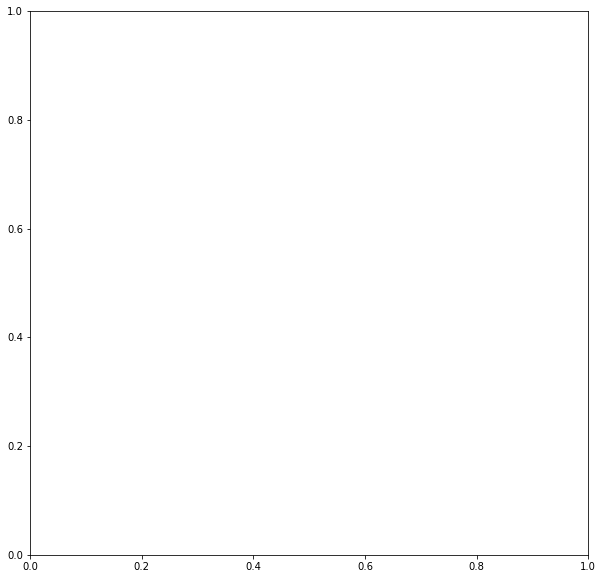

In [15]:
x_start, y_start = -2, -1.5  # an interesting region starts here
width, height = 3, 3  # for 3 units up and right
density_per_unit = 250  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object



In [16]:
def init():
    # Initialize an empty `path`
    line.set_data([],[])
    return line,

In [19]:
def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks
    
    X = np.empty((len(re), len(im)))  # re-initialize the array-like image
    threshold = round(1.15**(i + 1))  # calculate the current threshold
    
    # iterations for the current threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)
    
    # associate colors to the iterations with an iterpolation
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]

In [22]:
anim = FuncAnimation(fig, animate, init_func=init, frames=45, interval=120, blit=True)

In [23]:
HTML(anim.to_jshtml())

<ipython-input-19-26260d85807b>:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])  # clear x-axis ticks
<ipython-input-19-26260d85807b>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])  # clear y-axis ticks


In [ ]:
anim.save('mandelbrot.gif',writer='imagemagick')